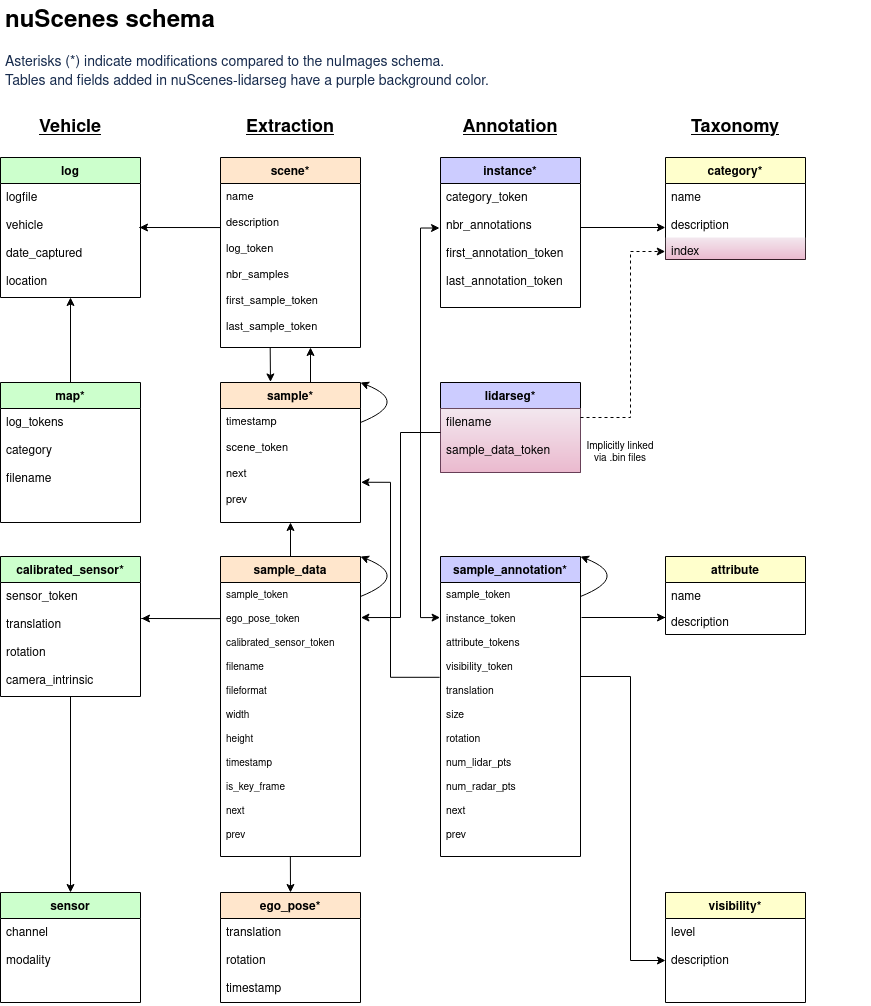

# Download NuScenes Datasets

In [ ]:


# !mkdir -p data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

# !wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

# !tar -xf v1.0-mini.tgz -C data/sets/nuscenes  # Uncompress the nuScenes mini split.

# !pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

# !conda install matplotlib==3.5.0

# Initialization

In [ ]:
# !conda install matplotlib
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='data/sets/nuscenes', verbose=True)

# A look at the dataset

## 1.scene

nuScenes is a large scale database that features annotated samples across 1000 scenes of approximately 20 seconds each. Let's take a look at the scenes that we have in the loaded database.

nuScenes 是一个大型数据库，包含 1000 个带注释的场景样本，每个场景约 20 秒。让我们来看看已加载数据库中的场景。

In [ ]:
# 查看当前数据集中有哪些 scene
nusc.list_scenes()

Let's look at a scene metadata

In [ ]:
# 通过索引获取 scene 对象
my_scene = nusc.scene[0]
my_scene

In [ ]:
# 通过 scene token 获取 scene 对象
my_scene = nusc.get('scene', nusc.scene[0]['token'])
my_scene

## 2.sample

In scenes, we annotate our data every half a second (2 Hz).

We define sample as an annotated keyframe of a scene at a given timestamp. A keyframe is a frame where the time-stamps of data from all the sensors should be very close to the time-stamp of the sample it points to.

Now, let us look at the first annotated sample in this scene.

在场景中，我们每半秒（2 Hz）对数据进行一次注释。

我们将样本定义为场景中给定时间戳的带注释的关键帧。关键帧是指所有传感器数据的时间戳与其指向的样本的时间戳非常接近的帧。

现在，让我们看一下该场景中第一个带注释的样本。

In [ ]:
# 通过 scene 的属性获取 sample token
first_sample_token = my_scene['first_sample_token']
# nusc.render_sample(first_sample_token) # 渲染当前 sample

Let's examine its metadata

In [ ]:
# 通过 sample token 获取 sample 对象
my_sample = nusc.get('sample', nusc.scene[0]['first_sample_token'])
my_sample

In [ ]:
# 通过 next 获取下一个 sample 对象
next_sample = nusc.get('sample', my_sample['next'])
next_sample

In [ ]:
nusc.list_sample(my_sample['token']) #  列出当前 token 对应的 sample 有哪些数据

## 3.sample data

The nuScenes dataset contains data that is collected from a full sensor suite. Hence, for each snapshot of a scene, we provide references to a family of data that is collected from these sensors.

nuScenes 数据集包含从完整传感器套件收集的数据。因此，对于场景的每个快照，我们都提供了从这些传感器收集的一系列数据的引用。

In [ ]:
# 获取当前 sample 中的所有 sample data
my_sample['data']

In [ ]:
# 获取特定传感器的数据
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

In [ ]:
# 获取特定传感器下一个时刻的数据
cam_next_data = nusc.get('sample_data', cam_front_data['next'])
cam_next_data

In [ ]:
nusc.render_sample_data(cam_front_data['token']) # 渲染当前 sample data
nusc.render_sample_data(cam_next_data['token']) # 渲染当前 sample data

## 4.sample_annotation

sample_annotation refers to any bounding box defining the position of an object seen in a sample. All location data is given with respect to the global coordinate system. Let's examine an example from our sample above.

sample_annotation 指的是定义样本中可见对象位置的任何边界框。所有位置数据均基于全局坐标系给出。让我们来看一下上面示例中的一个例子。

In [ ]:
my_annotation_token = my_sample['anns'][18]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
my_annotation_metadata

In [ ]:
next_annotation_metadata =  nusc.get('sample_annotation', my_annotation_metadata['next'])
next_annotation_metadata

In [ ]:
# 渲染当前 annotation
nusc.render_annotation(my_annotation_token)
nusc.render_annotation(next_annotation_metadata['token'])

## 5.instance

Object instance are instances that need to be detected or tracked by an AV (e.g a particular vehicle, pedestrian). Let us examine an instance metadata

对象实例是指需要被自动驾驶汽车检测或追踪的实例（例如，特定车辆、行人）。让我们来看一下实例元数据

In [ ]:
my_instance = nusc.instance[599]
my_instance

In [ ]:
my_category = nusc.get('category', 'fedb11688db84088883945752e480c2c')
my_category

In [ ]:
instance_token = my_instance['token']
# 渲染当前 instance
nusc.render_instance(instance_token)

In [ ]:
print("First annotated sample of this instance:")
# 渲染 first_annotation_token 对应的 annotation
nusc.render_annotation(my_instance['first_annotation_token'])

In [ ]:
print("Last annotated sample of this instance")
# 渲染 last_annotation_token 对应的 annotation
nusc.render_annotation(my_instance['last_annotation_token'])

## 6.category

A category is the object assignment of an annotation. Let's look at the category table we have in our database. The table contains the taxonomy of different object categories and also list the subcategories (delineated by a period).

类别是注释的对象分配。让我们看看数据库中的类别表。该表包含不同对象类别的分类法，并列出了子类别（以句点分隔）。

In [ ]:
# 查看有哪些类别
nusc.list_categories()

In [ ]:
# 查看类别记录，包含该特定类别的名称和描述
nusc.category[9]

## 7.attribute

An attribute is a property of an instance that may change throughout different parts of a scene while the category remains the same. Here we list the provided attributes and the number of annotations associated with a particular attribute.

属性是实例的属性，在场景的不同部分中可能会发生变化，但类别保持不变。这里我们列出了提供的属性以及与特定属性关联的注释数量。

In [ ]:
nusc.list_attributes()

In [ ]:
my_instance = nusc.instance[27]
first_token = my_instance['first_annotation_token']
last_token = my_instance['last_annotation_token']
nbr_samples = my_instance['nbr_annotations']
current_token = first_token

i = 0
found_change = False
while current_token != last_token:
    current_ann = nusc.get('sample_annotation', current_token)
    current_attr = nusc.get('attribute', current_ann['attribute_tokens'][0])['name']

    if i == 0:
        pass
    elif current_attr != last_attr:
        print("Changed from `{}` to `{}` at timestamp {} out of {} annotated timestamps".format(last_attr, current_attr, i, nbr_samples))
        found_change = True

    next_token = current_ann['next']
    current_token = next_token
    last_attr = current_attr
    i += 1

## 8.visibility

visibility is defined as the fraction of pixels of a particular annotation that are visible over the 6 camera feeds, grouped into 4 bins.

可见性定义为在 6 个摄像机馈送中可见的特定注释的像素分数，分为 4 个层级。

In [ ]:
nusc.visibility

In [ ]:
anntoken = 'a7d0722bce164f88adf03ada491ea0ba'
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']

print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)

In [ ]:
anntoken = '9f450bf6b7454551bbbc9a4c6e74ef2e'
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']

print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)

## 9.sensor

The nuScenes dataset consists of data collected from our full sensor suite which consists of:

nuScenes 数据集由从我们的完整传感器套件收集的数据组成，其中包括：

*   1 x LIDAR
*   5 x RADAR
*   6 x cameras



In [ ]:
nusc.sensor

In [ ]:
# 每个采样数据都会记录其采集所使用的 sensor (channel key 中)
nusc.sample_data[10]

## 10.calibrated_sensor

calibrated_sensor consists of the definition of a particular sensor (lidar/radar/camera) as calibrated on a particular vehicle. Let us look at an example.

calibrated_sensor 包含特定传感器（激光雷达/雷达/摄像头）在特定车辆上校准的定义。我们来看一个例子。

In [ ]:
nusc.calibrated_sensor[0]


## 11.ego_pose

ego_pose contains information about the location (encoded in translation) and the orientation (encoded in rotation) of the ego vehicle, with respect to the global coordinate system.

ego_pose 包含有关 ego_vehicle 相对于全局坐标系的位置（以平移编码）和方向（以旋转编码）的信息。

In [ ]:
nusc.ego_pose[0]

In [ ]:
nusc.log[0]

## 12.log

The log table contains log information from which the data was extracted. A log record corresponds to one journey of our ego vehicle along a predefined route. Let's check the number of logs and the metadata of a log.

日志表包含从中提取数据的日志信息。一条日志记录对应着我们的自主车辆沿着预定路线的一次行程。让我们检查一下日志的数量和日志的元数据。

In [ ]:
print("Number of `logs` in our loaded database: {}".format(len(nusc.log)))

In [ ]:
nusc.log[0]

Notice that it contains a variety of information such as the date and location of the log collected. It also gives out information about the map from where the data was collected. Note that one log can contain multiple non-overlapping scenes.

请注意，它包含各种信息，例如日志收集的日期和位置。它还提供了数据收集地图的信息。需要注意的是，一个日志可以包含多个不重叠的场景。

## 13.map

Map information is stored as binary semantic masks from a top-down view. Let's check the number of maps and metadata of a map.

地图信息以自上而下视角存储为二进制语义掩码形式。让我们来查看一下地图的数量以及地图的元数据。

In [ ]:
print("There are {} maps masks in the loaded dataset".format(len(nusc.map)))

In [ ]:
nusc.map[0]

# nuScenes Basics

The NuScenes class holds several tables. Each table is a list of records, and each record is a dictionary. For example the first record of the category table is stored at:

NuScenes 类包含多个表。每个表都是一个记录列表，每个记录又是一个字典。例如，category 表的第一条记录存储在：

In [ ]:
nusc.category[0]

The category table is simple: it holds the fields name and description. It also has a token field, which is a unique record identifier. Since the record is a dictionary, the token can be accessed like so:

category 表很简单：它包含字段名称和描述。它还有一个 token 字段，它是一个唯一的记录标识符。由于该记录是一个字典，因此可以像这样访问 token：

In [ ]:
cat_token = nusc.category[0]['token']
cat_token

If you know the token for any record in the DB you can retrieve the record by doing

如果您知道数据库中任何记录的 token，则可以通过执行以下操作来检索记录

In [ ]:
nusc.get('category', cat_token)

OK, that was easy. Let's try something harder. Let's look at the sample_annotation table.

好的，这很简单。让我们尝试一些更难的事情。让我们看看 sample_annotation 表。

In [ ]:
nusc.sample_annotation[0]

This also has a token field (they all do). In addition, it has several fields of the format [a-z]*_token, e.g. instance_token. These are foreign keys in database terminology, meaning they point to another table. Using nusc.get() we can grab any of these in constant time. For example, let's look at the visibility record.

它也有一个 token 字段（所有数据库都有）。此外，它还有几个格式为 [a-z]*_token 的字段，例如：instance_token。用数据库术语来说，这些是外键，指向另一个表。使用 nusc.get() 我们可以以恒定时间获取其中任何一个。例如，让我们看一下可见性记录。

In [ ]:
nusc.get('visibility', nusc.sample_annotation[0]['visibility_token'])

The visibility records indicate how much of an object was visible when it was annotated.

可见性记录指示注释对象时有多少部分是可见的。

Let's also grab the instance_token

我们来获取instance_token

In [ ]:
one_instance = nusc.get('instance', nusc.sample_annotation[0]['instance_token'])
one_instance

This points to the instance table. This table enumerate the object instances we have encountered in each scene. This way we can connect all annotations of a particular object.

它指向实例表。该表列举了我们在每个场景中遇到的对象 instance。这样我们就可以连接特定对象的所有 annotation。

If you look carefully at the README tables, you will see that the sample_annotation table points to the instance table, but the instance table doesn't list all annotations that point to it.

如果仔细查看 README 表，您会发现 sample_annotation 表指向 instance 表，但 instance 表并未列出指向它的所有 annotation。

So how can we recover all sample_annotations for a particular object instance? There are two ways:

那么，我们如何恢复特定对象实例的所有 sample_annotations 呢？有两种方法：

1.   Use nusc.field2token(). Let's try it:

In [ ]:
ann_tokens = nusc.field2token('sample_annotation', 'instance_token', one_instance['token'])

This returns a list of all sample_annotation records with the 'instance_token' == one_instance['token']. Let's store these in a set for now

这将返回所有包含 'instance_token' == one_instance['token'] 的 sample_annotation 记录的列表。我们先将它们存储在一个集合中。

In [ ]:
ann_tokens_field2token = set(ann_tokens)

ann_tokens_field2token

The nusc.field2token() method is generic and can be used in any similar situation

nusc.field2token() 方法是通用的，可以在任何类似情况下使用

2.   For certain situation, we provide some reverse indices in the tables themselves. This is one such example.

在某些情况下，我们会在表中提供一些反向索引。这就是一个例子。

The instance record has a field first_annotation_token which points to the first annotation in time of this instance. Recovering this record is easy.

instance 记录中有一个字段 first_annotation_token，指向该 instance 当前时间的第一个注释。恢复此记录很容易。

In [ ]:
ann_record = nusc.get('sample_annotation', one_instance['first_annotation_token'])
ann_record

Now we can traverse all annotations of this instance using the "next" field. Let's try it.

现在我们可以使用“next”字段遍历此实例的所有 annotation。我们来试试吧。

In [ ]:
ann_tokens_traverse = set()
ann_tokens_traverse.add(ann_record['token'])
while not ann_record['next'] == '':
    ann_record = nusc.get('sample_annotation', ann_record['next'])
    ann_tokens_traverse.add(ann_record['token'])

Finally, let's assert that we recovered the same ann_records as we did using nusc.field2token:

最后，让我们断言我们恢复了与使用 nusc.field2token 相同的 ann_records：

In [ ]:
print(ann_tokens_traverse == ann_tokens_field2token)

# Reverse indexing and short-cuts

The nuScenes tables are normalized, meaning that each piece of information is only given once. For example, there is one map record for each log record. Looking at the schema you will notice that the map table has a log_token field, but that the log table does not have a corresponding map_token field. But there are plenty of situations where you have a log, and want to find the corresponding map! So what to do? You can always use the nusc.field2token() method, but that is slow and inconvenient. We therefore add reverse mappings for some common situations including this one.

nuScenes 表是规范化的，这意味着每条信息只提供一次。例如，每条 log 记录对应一条 map 记录。查看架构图，您会注意到映射表包含一个 log_token 字段，但日志表没有对应的 map_token 字段。但是，很多情况下，您有日志，并且想要找到对应的 map！那么该怎么办呢？您始终可以使用 nusc.field2token() 方法，但该方法速度慢且不方便。因此，我们为一些常见情况（包括这种情况）添加了反向映射。

Further, there are situations where one needs to go through several tables to get a certain piece of information. Consider, for example, the category name (e.g. human.pedestrian) of a sample_annotation. The sample_annotation table doesn't hold this information since the category is an instance level constant. Instead the sample_annotation table points to a record in the instance table. This, in turn, points to a record in the category table, where finally the name fields stores the required information.

此外，在某些情况下，需要遍历多个表才能获取特定信息。例如，考虑一个 sample_annotation 的 category 名称（例如 human.pedestrian）。由于 category 是实例级常量，因此 sample_annotation 表不保存此信息。相反，sample_annotation 表指向 instance 表中的一条记录。该记录又指向类别表中的一条记录，最终，该 category 表中的名称字段存储了所需的信息。

Since it is quite common to want to know the category name of an annotation, we add a category_name field to the sample_annotation table during initialization of the NuScenes class.

由于获取 annotation 的 category 名称是很常见的，因此我们在 NuScenes 类初始化期间向 sample_annotation 表添加了一个 category_name 字段。

In this section, we list the short-cuts and reverse indices that are added to the NuScenes class during initialization. These are all created in the NuScenes.__make_reverse_index__() method.

在本节中，我们列出了在初始化期间添加到 NuScenes 类的快捷方式和反向索引。这些都是在 NuScenes.__make_reverse_index__() 方法中创建的。

## Reverse indices

We add two reverse indices by default.

我们默认添加两个反向索引。

*   A map_token field is added to the log records.

    日志记录中添加了map_token字段。

*   The sample records have shortcuts to all sample_annotations for that record as well as sample_data key-frames. Confer nusc.list_sample() method in the previous section for more details on this.

    样本记录包含指向该记录所有 sample_annotations 以及 sample_data 关键帧的快捷方式。更多详情请参阅上一节中的 nusc.list_sample() 方法。


## Shortcuts

The sample_annotation table has a "category_name" shortcut.

sample_annotation 表有一个“category_name”快捷方式。

Using shortcut:

In [ ]:
catname = nusc.sample_annotation[0]['category_name']

ann_rec = nusc.sample_annotation[0]
inst_rec = nusc.get('instance', ann_rec['instance_token'])
cat_rec = nusc.get('category', inst_rec['category_token'])

print(catname == cat_rec['name'])

The sample_data table has "channel" and "sensor_modality" shortcuts:

sample_data 表有“channel”和“sensor_modality”快捷方式：

In [ ]:
# Shortcut
channel = nusc.sample_data[0]['channel']

# No shortcut
sd_rec = nusc.sample_data[0]
cs_record = nusc.get('calibrated_sensor', sd_rec['calibrated_sensor_token'])
sensor_record = nusc.get('sensor', cs_record['sensor_token'])

print(channel == sensor_record['channel'])

# Data Visualizations

We provide list and rendering methods. These are meant both as convenience methods during development, and as tutorials for building your own visualization methods. They are implemented in the NuScenesExplorer class, with shortcuts through the NuScenes class itself.

我们提供列表和渲染方法。这些方法既可以在开发过程中提供便捷的功能，也可以作为构建自定义可视化方法的教程。它们在 NuScenesExplorer 类中实现，并可通过 NuScenes 类本身提供快捷方式。

## List methods

There are three list methods available.

1.  list_categories() lists all categories, counts and statistics of width/length/height in meters and aspect ratio.

    list_categories() 列出所有类别、计数以及宽度/长度/高度（以米为单位）和纵横比的统计数据。

In [ ]:
nusc.list_categories()

2.  list_attributes() lists all attributes and counts.

    list_attributes() 列出所有属性和计数。

In [ ]:
nusc.list_attributes()

3.  list_scenes() lists all scenes in the loaded DB.

    list_scenes() 列出已加载的 DB 中的所有场景。

In [ ]:
nusc.list_attributes()

## Render

First, let's plot a lidar point cloud in an image. Lidar allows us to accurately map the surroundings in 3D.

首先，让我们在图像中绘制一个激光雷达点云。激光雷达使我们能够精确地绘制 3D 周围环境。

In [ ]:
my_sample = nusc.sample[10]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

In the previous image the colors indicate the distance from the ego vehicle to each lidar point. We can also render the lidar intensity. In the following image the traffic sign ahead of us is highly reflective (yellow) and the dark vehicle on the right has low reflectivity (purple).

在上图中，颜色表示车辆与每个激光雷达点之间的距离。我们还可以渲染激光雷达的强度。在下图中，我们前方的交通标志反射率较高（黄色），而右侧的深色车辆反射率较低（紫色）。

In [ ]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP', render_intensity=True)

Second, let's plot the radar point cloud for the same image. Radar is less dense than lidar, but has a much larger range.

其次，让我们绘制同一幅图像的雷达点云。雷达的密度低于激光雷达，但探测范围更大。

In [ ]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT')

We can also plot all annotations across all sample data for that sample. Note how for radar we also plot the velocity vectors of moving objects. Some velocity vectors are outliers, which can be filtered using the settings in RadarPointCloud.from_file()

我们还可以绘制该样本所有样本数据的所有 annotation。请注意，对于雷达，我们还绘制了运动物体的速度矢量。有些速度矢量是异常值，可以使用 RadarPointCloud.from_file() 中的设置进行过滤。

In [ ]:
my_sample = nusc.sample[20]

# The rendering command below is commented out because it may crash in notebooks
# nusc.render_sample(my_sample['token'])

Or if we only want to render a particular sensor, we can specify that.

或者如果我们只想渲染特定的传感器，我们可以指定它。

In [ ]:
nusc.render_sample_data(my_sample['data']['CAM_FRONT'])

Additionally we can aggregate the point clouds from multiple sweeps to get a denser point cloud.

此外，我们可以聚合来自多个扫描的点云以获得更密集的点云。

In [ ]:
nusc.render_sample_data(my_sample['data']['LIDAR_TOP'], nsweeps=5, underlay_map=True)
nusc.render_sample_data(my_sample['data']['RADAR_FRONT'], nsweeps=5, underlay_map=True)

In the radar plot above we only see very confident radar returns from two vehicles. This is due to the filter settings defined in the file nuscenes/utils/data_classes.py. If instead we want to disable all filters and render all returns, we can use the disable_filters() function. This returns a denser point cloud, but with many returns from background objects. To return to the default settings, simply call default_filters().

在上面的雷达图中，我们只看到来自两辆车的非常可信的雷达回波。这是由于文件 nuscenes/utils/data_classes.py 中定义的过滤器设置造成的。如果我们想禁用所有过滤器并渲染所有回波，可以使用 disable_filters() 函数。这将返回更密集的点云，但包含许多来自背景物体的回波。要恢复默认设置，只需调用 default_filters() 函数即可。

In [ ]:
from nuscenes.utils.data_classes import RadarPointCloud
RadarPointCloud.disable_filters()
nusc.render_sample_data(my_sample['data']['RADAR_FRONT'], nsweeps=5, underlay_map=True)
RadarPointCloud.default_filters()

We can even render a specific annotation.

我们甚至可以呈现特定的注释。

In [ ]:
nusc.render_annotation(my_sample['anns'][22])

Finally, we can render a full scene as a video. There are two options here:

最后，我们可以将整个场景渲染为视频。这里有两个选项：



1.  nusc.render_scene_channel() renders the video for a particular channel. (HIT ESC to exit)

    nusc.render_scene_channel() 用于渲染特定频道的视频。（按 ESC 键退出）

2.  nusc.render_scene() renders the video for all camera channels.

    nusc.render_scene() 为所有摄像机通道渲染视频。

NOTE: These methods use OpenCV for rendering, which doesn't always play nice with IPython Notebooks. If you experience any issues please run these lines from the command line.

注意：这些方法使用 OpenCV 进行渲染，这在 IPython Notebooks 中并不总是兼容良好。如果您遇到任何问题，请从命令行运行这些代码。

Let's grab scene 0061, it is nice and dense.

让我们抓住场景 0061，它很漂亮而且很密集。

In [ ]:
my_scene_token = nusc.field2token('scene', 'name', 'scene-0061')[0]

In [ ]:
# The rendering command below is commented out because it may crash in notebooks
# nusc.render_scene_channel(my_scene_token, 'CAM_FRONT')

There is also a method nusc.render_scene() which renders the video for all camera channels. This requires a high-res monitor, and is also best run outside this notebook.

还有一种方法 nusc.render_scene()，它可以渲染所有摄像头通道的视频。这需要高分辨率显示器，并且最好在此笔记本之外运行。

In [ ]:
# The rendering command below is commented out because it may crash in notebooks
# nusc.render_scene(my_scene_token)

Finally, let us visualize all scenes on the map for a particular location.

最后，让我们将特定位置的所有场景在地图上可视化。

In [ ]:
nusc.render_egoposes_on_map(log_location='singapore-onenorth')